In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [3]:
df=pd.read_csv("urop.csv")


# extract all echo data
df = df.drop(["IDshort",'SERNO','HistoCode'], 1)
echo=df.iloc[:,19:55]

# fill in missing data
for col in echo.columns:
    echo[col].fillna(echo[col].mean(),inplace=True)

    
# extract healthy left ventricle data
mask=df["Cardiac_Category (0=good; 1=poor)"]==0
healthy_echo=echo[mask]
good_lv=healthy_echo.iloc[:,1:7]

# extract unhealthy left ventricle data
mask1=df["Cardiac_Category (0=good; 1=poor)"]!=0
unhealthy_df=df[mask1]
bad_echo=unhealthy_df.iloc[:,19:55]
bad_lv=bad_echo.iloc[:,1:7]


# extract all left ventricle data that is labelled with CC
echo_results= list(df.columns[20:26]) + list(df.columns[-2:-1])
lv=df[echo_results]





In [3]:
bad_lv.head(3)

,IVSD__cm,IVSS__cm,LVIDD_cm,LVIDS_cm,LVPWD_cm,LVPWS_cm
0,0.7,1.0,4.3,2.4,0.7,1.4
1,0.8,1.0,4.7,3.1,0.7,1.6
2,0.7,1.0,4.2,2.8,1.0,1.6


In [4]:
good_lv.head(3)

,IVSD__cm,IVSS__cm,LVIDD_cm,LVIDS_cm,LVPWD_cm,LVPWS_cm
3,0.7,0.9,4.0,2.7,0.6,1.1
7,1.0,1.5,6.1,4.0,1.2,1.7
12,0.7,1.2,4.3,2.4,0.8,1.3


In [5]:
lv.head(3)

,IVSD__cm,IVSS__cm,LVIDD_cm,LVIDS_cm,LVPWD_cm,LVPWS_cm,Cardiac_Category (0=good; 1=poor)
0,0.7,1.0,4.3,2.4,0.7,1.4,1
1,0.8,1.0,4.7,3.1,0.7,1.6,1
2,0.7,1.0,4.2,2.8,1.0,1.6,1


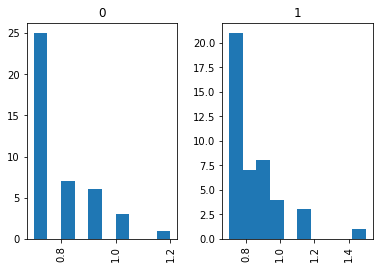

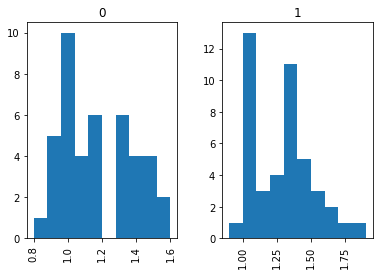

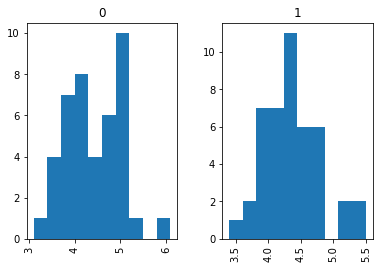

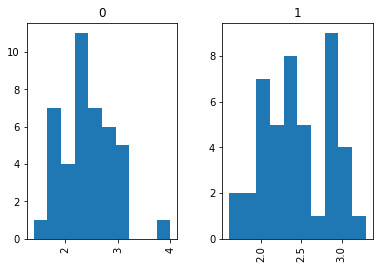

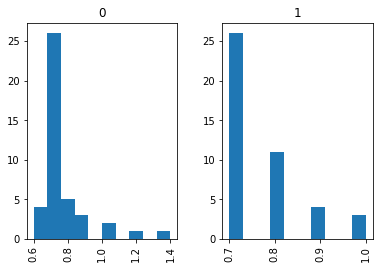

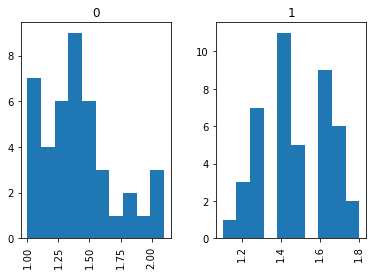

In [6]:
for name in good_lv.columns:
    lv.hist(column=name,by='Cardiac_Category (0=good; 1=poor)')

<AxesSubplot:>

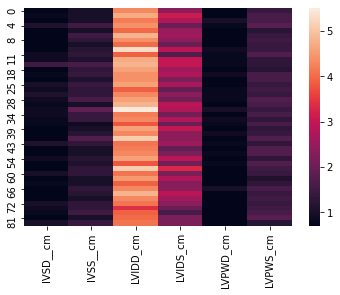

In [7]:

sns.heatmap(bad_lv)

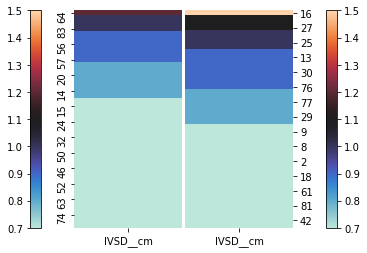

In [8]:
# left-good , right - bad

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.02)

low, high = lv["IVSD__cm"].min(), lv["IVSD__cm"].max()

df1=pd.DataFrame(good_lv["IVSD__cm"].sort_values(ascending=False))
df2=pd.DataFrame(bad_lv["IVSD__cm"].sort_values(ascending=False))

sns.heatmap(df1, cmap="icefire", ax=ax1, cbar=False , vmin=low,  vmax=high)
fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=False, pad=0.2)
 
sns.heatmap(df2, cmap="icefire", ax=ax2, cbar=False , vmin=low , vmax=high)
fig.colorbar(ax2.collections[0], ax=ax2, location="right", use_gridspec=False, pad=0.2)

ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()


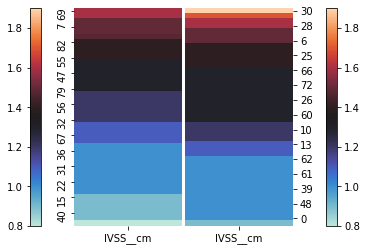

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.02)

low, high = lv["IVSS__cm"].min(), lv["IVSS__cm"].max()

df1=pd.DataFrame(good_lv["IVSS__cm"].sort_values(ascending=False))
df2=pd.DataFrame(bad_lv["IVSS__cm"].sort_values(ascending=False))

sns.heatmap(df1, cmap="icefire", ax=ax1, cbar=False , vmin=low,  vmax=high)
fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=False, pad=0.2)
 
sns.heatmap(df2, cmap="icefire", ax=ax2, cbar=False , vmin=low , vmax=high)
fig.colorbar(ax2.collections[0], ax=ax2, location="right", use_gridspec=False, pad=0.2)

ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()


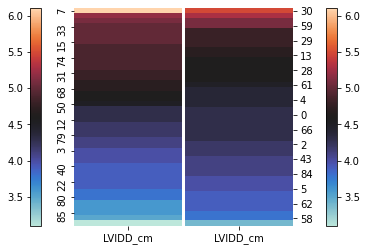

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.02)

low, high = lv["LVIDD_cm"].min(), lv["LVIDD_cm"].max()

df1=pd.DataFrame(good_lv["LVIDD_cm"].sort_values(ascending=False))
df2=pd.DataFrame(bad_lv["LVIDD_cm"].sort_values(ascending=False))

sns.heatmap(df1, cmap="icefire", ax=ax1, cbar=False , vmin=low,  vmax=high)
fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=False, pad=0.2)
 
sns.heatmap(df2, cmap="icefire", ax=ax2, cbar=False , vmin=low , vmax=high)
fig.colorbar(ax2.collections[0], ax=ax2, location="right", use_gridspec=False, pad=0.2)

ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()


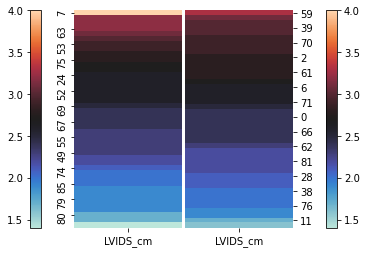

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.02)

low, high = lv["LVIDS_cm"].min(), lv["LVIDS_cm"].max()

df1=pd.DataFrame(good_lv["LVIDS_cm"].sort_values(ascending=False))
df2=pd.DataFrame(bad_lv["LVIDS_cm"].sort_values(ascending=False))

sns.heatmap(df1, cmap="icefire", ax=ax1, cbar=False , vmin=low,  vmax=high)
fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=False, pad=0.2)
 
sns.heatmap(df2, cmap="icefire", ax=ax2, cbar=False , vmin=low , vmax=high)
fig.colorbar(ax2.collections[0], ax=ax2, location="right", use_gridspec=False, pad=0.2)

ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()

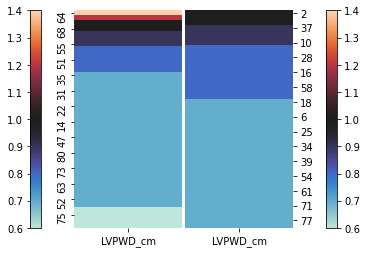

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.02)

low, high = lv["LVPWD_cm"].min(), lv["LVPWD_cm"].max()

df1=pd.DataFrame(good_lv["LVPWD_cm"].sort_values(ascending=False))
df2=pd.DataFrame(bad_lv["LVPWD_cm"].sort_values(ascending=False))

sns.heatmap(df1, cmap="icefire", ax=ax1, cbar=False , vmin=low,  vmax=high)
fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=False, pad=0.2)
 
sns.heatmap(df2, cmap="icefire", ax=ax2, cbar=False , vmin=low , vmax=high)
fig.colorbar(ax2.collections[0], ax=ax2, location="right", use_gridspec=False, pad=0.2)

ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()

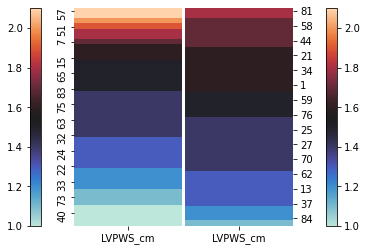

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.02)

low, high = lv["LVPWS_cm"].min(), lv["LVPWS_cm"].max()

df1=pd.DataFrame(good_lv["LVPWS_cm"].sort_values(ascending=False))
df2=pd.DataFrame(bad_lv["LVPWS_cm"].sort_values(ascending=False))

sns.heatmap(df1, cmap="icefire", ax=ax1, cbar=False , vmin=low,  vmax=high)
fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=False, pad=0.2)
 
sns.heatmap(df2, cmap="icefire", ax=ax2, cbar=False , vmin=low , vmax=high)
fig.colorbar(ax2.collections[0], ax=ax2, location="right", use_gridspec=False, pad=0.2)

ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()

In [15]:
lv.columns

Index(['IVSD__cm', 'IVSS__cm', 'LVIDD_cm', 'LVIDS_cm', 'LVPWD_cm', 'LVPWS_cm',
       'Cardiac_Category (0=good; 1=poor)'],
      dtype='object')

# Try to do correlation matrix ---  Find from past file!

In [14]:
good_lv

,IVSD__cm,IVSS__cm,LVIDD_cm,LVIDS_cm,LVPWD_cm,LVPWS_cm
3,0.7,0.90,4.00,2.7,0.6,1.10
7,1.0,1.50,6.10,4.0,1.2,1.70
12,0.7,1.20,4.30,2.4,0.8,1.30
14,0.8,1.40,4.30,1.9,0.7,1.30
15,0.7,0.90,5.00,3.2,0.9,1.60
17,0.7,1.20,3.60,2.0,0.7,1.30
20,0.8,1.30,4.90,2.8,0.7,1.50
22,0.7,1.00,3.90,2.4,0.7,1.30
23,0.7,1.00,3.60,2.2,0.8,1.00
24,0.7,1.00,4.20,2.6,0.7,1.30


In [4]:
good_lv_corr=good_lv.corr()

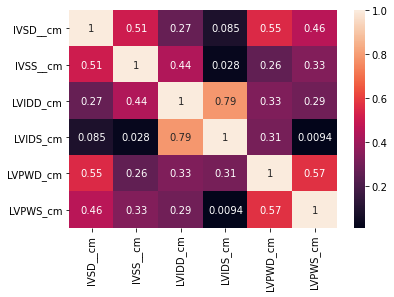

In [5]:
healthy_heatmap=sns.heatmap(good_lv_corr,annot=True)

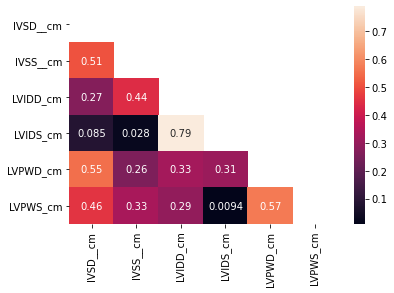

In [7]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(good_lv_corr)
tri_healthy_heatmap=sns.heatmap(good_lv_corr,annot=True,mask=matrix)

In [20]:
bad_lv_corr = bad_lv.corr()

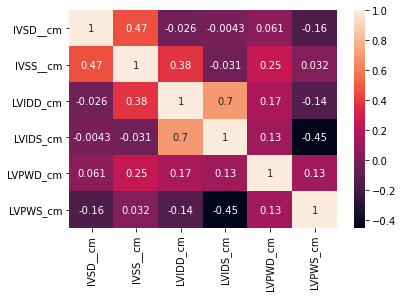

In [21]:
unhealthy_heatmap=sns.heatmap(bad_lv_corr,annot=True)

In [26]:
lv_corr= lv.drop(columns='Cardiac_Category (0=good; 1=poor)').corr()

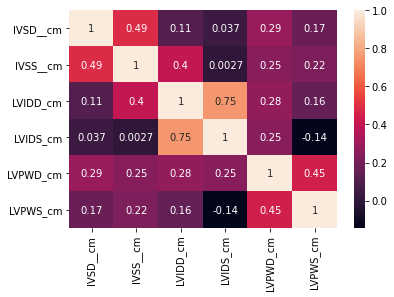

In [27]:
all_heatmap=sns.heatmap(lv_corr,annot=True)

In [ ]:
# how is correlation matrix calculated?